In [21]:
import pandas as pd
import numpy as np
import random
from sklearn import tree
from matplotlib import pyplot as plt

###Sources:
https://studygyaan.com/data-science/creating-a-decision-tree-using-the-id3-algorithm

#### Step 1: Data Preprocessing:
Clean and preprocess the data. Handle missing values and convert categorical variables into numerical representations if needed.
#### Step 2: Selecting the Root Node:
Calculate the entropy of the target variable (class labels) based on the dataset. The formula for entropy is:
Entropy(S) = -Σ (p_i * log2(p_i))
where p_i is the proportion of instances belonging to class i.
#### Step 3: Calculating Information Gain:
For each attribute in the dataset, calculate the information gain when the dataset is split on that attribute. The formula for information gain is:
Information Gain(S, A) = Entropy(S) - Σ ((|S_v| / |S|) * Entropy(S_v))
where S_v is the subset of instances for each possible value of attribute A, and |S_v| is the number of instances in that subset.
#### Step 4: Selecting the Best Attribute:
Choose the attribute with the highest information gain as the decision node for the tree.

#### Step 5: Splitting the Dataset:
Split the dataset based on the values of the selected attribute.

#### Step 6: Repeat the Process:
Recursively repeat steps 2 to 5 for each subset until a stopping criterion is met (e.g., the tree depth reaches a maximum limit or all instances in a subset belong to the same class).

In [23]:
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
display(df)

,Weather,Temperature,Humidity,Windy,Play Tennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


#### Step 1: Data preprocessing
In this case pre-processing is not necessary
#### Step 2: Calculating Entropy:
To calculate entropy, we first determine the proportion of positive and negative instances in the dataset:

Positive instances (Play Tennis = Yes): 9
Negative instances (Play Tennis = No): 5

***Entropy(S) = -(9/14) * log2(9/14) – (5/14) * log2(5/14) ≈ 0.940***
#### Step 3: Calculating Information Gain:
We calculate the information gain for each attribute (Weather, Temperature, Humidity, Windy) and choose the attribute with the highest information gain as the root node.

***Information Gain(S, Weather) = Entropy(S) – [(5/14) * Entropy(Sunny) + (4/14) * Entropy(Overcast) + (5/14) * Entropy(Rainy)] ≈ 0.246***

***Information Gain(S, Temperature) = Entropy(S) – [(4/14) * Entropy(Hot) + (4/14) * Entropy(Mild) + (6/14) * Entropy(Cool)] ≈ 0.029***

***Information Gain(S, Humidity) = Entropy(S) – [(7/14) * Entropy(High) + (7/14) * Entropy(Normal)] ≈ 0.152***
***Information Gain(S, Windy) = Entropy(S) – [(8/14) * Entropy(False) + (6/14) * Entropy(True)] ≈ 0.048***

#### Step 4: Selecting the Best Attribute:
The “Weather” attribute has the highest information gain, so we select it as the root node for our decision tree.

#### Step 5: Splitting the Dataset:
We split the dataset based on the values of the “Weather” attribute into three subsets - **Sunny**, **Overcast** and **Rainy**.
#### Step 6: Repeat the Process:
Since the “Weather” attribute has no repeating values in any subset, we stop splitting and label each leaf node with the majority class in that subset. The decision tree will be following:
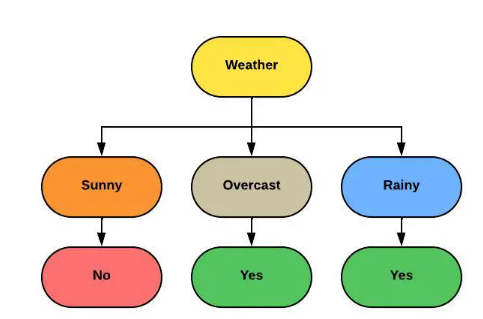

In [24]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def information_gain(data, split_attribute_name, target_name):
    total_entropy = entropy(data[target_name])
    vals, counts= np.unique(data[split_attribute_name], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    information_gain_val = total_entropy - weighted_entropy
    return information_gain_val

def id3_algorithm(data, original_data, features, target_attribute_name, parent_node_class):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]
        item_values = [information_gain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature: {}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = id3_algorithm(sub_data, data, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree
        return tree

def predict(query, tree, default = 1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

def train_test_split(df, test_size):
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))
    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

train_data, test_data = train_test_split(df, test_size=0.2)

def fit(df, target_attribute_name, features):
    return id3_algorithm(df, df, features, target_attribute_name, None)

def get_accuracy(df, tree):
    df["classification"] = df.apply(predict, axis=1, args=(tree, 'Yes'))
    df["classification_correct"] = df["classification"] == df["Play Tennis"]
    accuracy = df["classification_correct"].mean()
    return accuracy

strom = fit(train_data, 'Play Tennis', ['Weather', 'Temperature', 'Humidity', 'Windy'])
accuracy = get_accuracy(test_data, strom)
print("Decision Tree:")
print(strom)
print("Accuracy:", accuracy)

Decision Tree:
{'Humidity': {'High': {'Weather': {'Overcast': 'Yes', 'Rainy': {'Windy': {False: 'Yes', True: 'No'}}, 'Sunny': 'No'}}, 'Normal': 'Yes'}}
Accuracy: 0.6666666666666666


In [28]:
import json
json_data = json.dumps(strom, indent=4)

# print the Converted JSON object
print(json_data)

{
    "Humidity": {
        "High": {
            "Weather": {
                "Overcast": "Yes",
                "Rainy": {
                    "Windy": {
                        "false": "Yes",
                        "true": "No"
                    }
                },
                "Sunny": "No"
            }
        },
        "Normal": "Yes"
    }
}


In [29]:
import pprint
pprint.pprint(json_data)

('{\n'
 '    "Humidity": {\n'
 '        "High": {\n'
 '            "Weather": {\n'
 '                "Overcast": "Yes",\n'
 '                "Rainy": {\n'
 '                    "Windy": {\n'
 '                        "false": "Yes",\n'
 '                        "true": "No"\n'
 '                    }\n'
 '                },\n'
 '                "Sunny": "No"\n'
 '            }\n'
 '        },\n'
 '        "Normal": "Yes"\n'
 '    }\n'
 '}')
